<a href="https://colab.research.google.com/github/Anushkaghei/V.A.R.K/blob/main/VAK_Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


  * Create a deep neural network that performs multi-class classification.
  * Tune the deep neural network.

## The Dataset
This is a multi-class classification problem with 3 output classes, one for each learning style.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

## Load the dataset

`tf.keras` provides a set of convenience functions for loading well-known datasets. Each of these convenience functions does the following:

* Loads both the training set and the test set.
* Separates each set into features and labels.

The relevant convenience function for MNIST is called `mnist.load_data()`:

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Kodikon/datasets/vak_quiz_data.csv")
display(df)
df.info()

,Gender,Age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Style
0,0,16,3,3,4,3,2,4,3,3,2,3,4,2,2,3,3,2
1,0,16,5,4,4,4,3,3,2,4,3,4,3,4,3,4,4,1
2,0,18,3,4,3,3,4,2,4,3,2,2,3,2,3,3,3,1
3,0,21,1,3,3,4,4,2,2,2,2,2,4,4,4,4,5,2
4,1,21,4,4,4,5,5,4,4,3,4,4,5,5,5,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,0,17,2,3,3,4,4,3,3,3,3,3,4,4,4,4,4,2
1206,0,18,5,2,4,3,3,3,3,3,3,5,3,5,4,3,3,2
1207,0,19,4,4,5,3,5,5,4,4,5,3,4,3,5,5,5,2
1208,1,17,2,3,5,4,4,4,4,5,4,3,4,5,2,3,5,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210 entries, 0 to 1209
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Gender  1210 non-null   int64
 1   Age     1210 non-null   int64
 2   Q1      1210 non-null   int64
 3   Q2      1210 non-null   int64
 4   Q3      1210 non-null   int64
 5   Q4      1210 non-null   int64
 6   Q5      1210 non-null   int64
 7   Q6      1210 non-null   int64
 8   Q7      1210 non-null   int64
 9   Q8      1210 non-null   int64
 10  Q9      1210 non-null   int64
 11  Q10     1210 non-null   int64
 12  Q11     1210 non-null   int64
 13  Q12     1210 non-null   int64
 14  Q13     1210 non-null   int64
 15  Q14     1210 non-null   int64
 16  Q15     1210 non-null   int64
 17  Style   1210 non-null   int64
dtypes: int64(18)
memory usage: 170.3 KB


In [4]:
churn_df = df[['Gender', 'Age', 'Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15','Style']]
churn_df.head()

,Gender,Age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Style
0,0,16,3,3,4,3,2,4,3,3,2,3,4,2,2,3,3,2
1,0,16,5,4,4,4,3,3,2,4,3,4,3,4,3,4,4,1
2,0,18,3,4,3,3,4,2,4,3,2,2,3,2,3,3,3,1
3,0,21,1,3,3,4,4,2,2,2,2,2,4,4,4,4,5,2
4,1,21,4,4,4,5,5,4,4,3,4,4,5,5,5,3,3,1


In [5]:
x = np.asanyarray(churn_df[['Gender', 'Age', 'Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10','Q11','Q12','Q13','Q14','Q15']])
x[0:5]

array([[ 0, 16,  3,  3,  4,  3,  2,  4,  3,  3,  2,  3,  4,  2,  2,  3,  3],
       [ 0, 16,  5,  4,  4,  4,  3,  3,  2,  4,  3,  4,  3,  4,  3,  4,  4],
       [ 0, 18,  3,  4,  3,  3,  4,  2,  4,  3,  2,  2,  3,  2,  3,  3,  3],
       [ 0, 21,  1,  3,  3,  4,  4,  2,  2,  2,  2,  2,  4,  4,  4,  4,  5],
       [ 1, 21,  4,  4,  4,  5,  5,  4,  4,  3,  4,  4,  5,  5,  5,  3,  3]])

In [6]:
y = np.asanyarray(df['Style'])
y [0:5]

array([2, 1, 1, 2, 1])

In [7]:
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x)
# std value = (x-myu)/sigma where myu is mean, sigma is variance
x[0:5]

array([[-1.01835015, -1.23562404, -0.26079255, -0.46636597,  0.63459284, -0.28474856, -1.10624671,  0.51640379, -0.42801861, -0.31019636, -1.20461633, -0.36921342,  0.42544364, -1.52046716,
        -1.45748557, -0.39122214, -0.51705101],
       [-1.01835015, -1.23562404,  1.53215621,  0.55039588,  0.63459284,  0.66180572, -0.21029054, -0.47384753, -1.40335292,  0.61428049, -0.25874627,  0.58947379, -0.46211982,  0.39495737,
        -0.56499694,  0.57288945,  0.49203241],
       [-1.01835015, -0.28755486, -0.26079255,  0.55039588, -0.35619082, -0.28474856,  0.68566563, -1.46409886,  0.5473157 , -0.31019636, -1.20461633, -1.32790064, -0.46211982, -1.52046716,
        -0.56499694, -0.39122214, -0.51705101],
       [-1.01835015,  1.13454889, -2.0537413 , -0.46636597, -0.35619082,  0.66180572,  0.68566563, -1.46409886, -1.40335292, -1.23467322, -1.20461633, -1.32790064,  0.42544364,  0.39495737,
         0.3274917 ,  0.57288945,  1.50111583],
       [ 0.98198051,  1.13454889,  0.63568183,  

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (968, 17) (968,)
Test set: (242, 17) (242,)


* `x_train` contains the training set's features.
* `y_train` contains the training set's labels.
* `x_test` contains the test set's features.
* `y_test` contains the test set's labels.

In [9]:
# Output example #3 of the training set.
x_train[3]

array([-1.01835015, -1.23562404,  0.63568183, -0.46636597,  0.63459284, -0.28474856, -0.21029054,  0.51640379, -0.42801861, -0.31019636, -0.25874627, -0.36921342,  0.42544364,  0.39495737,
       -0.56499694,  0.57288945,  0.49203241])

## Define a plotting function

The following function plots an accuracy curve:

In [10]:
#@title Define the plotting function
def plot_curve(epochs, hist, list_of_metrics):
  """Plot a curve of one or more classification metrics vs. epoch."""  
  # list_of_metrics should be one of the names shown in:
  # https://www.tensorflow.org/tutorials/structured_data/imbalanced_data#define_the_model_and_metrics  

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Value")

  for m in list_of_metrics:
    x = hist[m]
    plt.plot(epochs[1:], x[1:], label=m)

  plt.legend()

print("Loaded the plot_curve function.")

Loaded the plot_curve function.


## Create a deep neural net model

The `create_model` function defines the topography of the deep neural net, specifying the following:

* The number of [layers](https://developers.google.com/machine-learning/glossary/#layer) in the deep neural net.
* The number of [nodes](https://developers.google.com/machine-learning/glossary/#node) in each layer.
* Any [regularization](https://developers.google.com/machine-learning/glossary/#regularization) layers.

The `create_model` function also defines the [activation function](https://developers.google.com/machine-learning/glossary/#activation_function) of each layer.  The activation function of the output layer is [softmax](https://developers.google.com/machine-learning/glossary/#softmax), which will yield 3 different outputs for each example. Each of the 3 outputs provides the probability that the input example is a certain learning style.

**Note:** Unlike several of the recent Colabs, this exercise does not define feature columns or a feature layer.  Instead, the model will train on the NumPy array.

In [11]:
def create_model(my_learning_rate):
  """Create and compile a deep neural net."""
  
  # All models in this course are sequential.
  model = tf.keras.models.Sequential()

  # Define the first hidden layer.   
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  model.add(tf.keras.layers.Dense(units=32, activation='relu'))
  # Define a dropout regularization layer. 
  model.add(tf.keras.layers.Dropout(rate=0.5))

  # Define the output layer. The units parameter is set to 3 because
  # the model must choose among 3 possible output values (representing
  # the digits from 0-2, inclusive).
  #
  # Don't change this layer.
  model.add(tf.keras.layers.Dense(units=3, activation='softmax'))     
                           
  # Construct the layers into a model that TensorFlow can execute.  
  # Notice that the loss function for multi-class classification
  # is different than the loss function for binary classification.  
  model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
  
  return model    


def train_model(model, train_features, train_label, epochs,
                batch_size=None, validation_split=0.1):
  """Train the model by feeding it data."""

  history = model.fit(x=train_features, y=train_label, batch_size=batch_size,
                      epochs=epochs, shuffle=True, 
                      validation_split=validation_split)
 
  # To track the progression of training, gather a snapshot
  # of the model's metrics at each epoch. 
  epochs = history.epoch
  hist = pd.DataFrame(history.history)

  return epochs, hist    

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/250
25/25 [==============================] - 1s 11ms/step - loss: 0.9574 - accuracy: 0.5426 - val_loss: 0.7930 - val_accuracy: 0.6649
Epoch 2/250
25/25 [==============================] - 0s 3ms/step - loss: 0.7471 - accuracy: 0.6615 - val_loss: 0.6366 - val_accuracy: 0.6959
Epoch 3/250
25/25 [==============================] - 0s 3ms/step - loss: 0.5690 - accuracy: 0.7442 - val_loss: 0.4951 - val_accuracy: 0.7887
Epoch 4/250
25/25 [==============================] - 0s 3ms/step - loss: 0.4059 - accuracy: 0.8411 - val_loss: 0.3857 - val_accuracy: 0.8351
Epoch 5/250
25/25 [==============================] - 0s 3ms/step - loss: 0.2840 - accuracy: 0.9109 - val_loss: 0.3119 - val_accuracy: 0.8711
Epoch 6/250
25/25 [==============================] - 0s 3ms/step - loss: 0.2001 - accuracy: 0.9251 - val_loss: 0.2668 - val_accuracy: 0.9175
Epoch 7/250
25/25 [==============================] - 0s 4ms/step - loss: 0.1529 - accuracy: 0.9444 - val_loss: 0.2858 - val_accuracy: 0.8918
Epoch 8/250


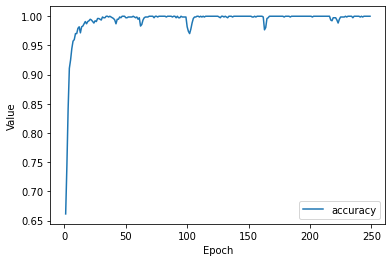

In [12]:
# The following variables are the hyperparameters.
learning_rate = 0.003
epochs = 250
batch_size = 32
validation_split = 0.2

# Establish the model's topography.
my_model = create_model(learning_rate)

# Train the model on the normalized training set.
epochs, hist = train_model(my_model, x_train, y_train, epochs, batch_size, validation_split) 

# Plot a graph of the metric vs. epochs.
list_of_metrics_to_plot = ['accuracy']
plot_curve(epochs, hist, list_of_metrics_to_plot)

# Evaluate against the test set.
print("\n Evaluate the new model against the test set:")
loss,acc=my_model.evaluate(x=x_test, y=y_test, batch_size=batch_size) #x_train_normalized

In [13]:
Xnew = np.asanyarray([[0,21,4,1,1,5,3,5,2,3,3,4,2,4,2,5,3], [1,21,4,4,4,5,5,4,4,3,4,4,5,5,5,3,3]])
# make a prediction
from sklearn import preprocessing
Xnew = preprocessing.StandardScaler().fit(Xnew).transform(Xnew)
# std value = (x-myu)/sigma where myu is mean, sigma is variance

ynew = my_model.predict(Xnew)
predict_classes=np.argmax(ynew,axis=1)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew[0], predict_classes[0]))
print("X=%s, Predicted=%s" % (Xnew[1], predict_classes[1]))

1/1 [==============================] - 0s 103ms/step
X=[-1.  0.  0. -1. -1.  0. -1.  1. -1.  0. -1.  0. -1. -1. -1.  1.  0.], Predicted=2
X=[ 1.  0.  0.  1.  1.  0.  1. -1.  1.  0.  1.  0.  1.  1.  1. -1.  0.], Predicted=2


In [14]:
my_model.save('/content/drive/MyDrive/Kodikon/saved_model/my_model.h5') 


In [15]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/Kodikon/saved_model/my_model.h5')

loss,acc=new_model.evaluate(x=x_test, y=y_test, batch_size=batch_size)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

8/8 [==============================] - 0s 2ms/step - loss: 0.0995 - accuracy: 0.9711
Restored model, accuracy: 97.11%
